# Machine Learning Classification Tutorial
### William Thyer, 2023

"The use and development of computer systems that are able to learn and adapt without following explicit instructions, by using algorithms and statistical models to analyze and draw inferences from patterns in data."


# Classification
A type of predictive modelling problem where a label is predicted for a given example of data. E.g. classifying flower species from petal and sepal width. 
![Alt text](images/iris.png)
![Alt text](images/petal_sepal.png)

In [2]:
import numpy as np # linear algebra (matrices etc.)
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # figures
import matplotlib.pyplot as plt # figures

from sklearn import datasets

In [57]:
%matplotlib inline
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

In [3]:
iris = datasets.load_iris()

In [17]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [27]:
species = np.array(iris['target_names'])[np.array(iris['target'])]

In [28]:
df = pd.DataFrame(iris['data'],columns=iris['feature_names'])
df['species'] = species 
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


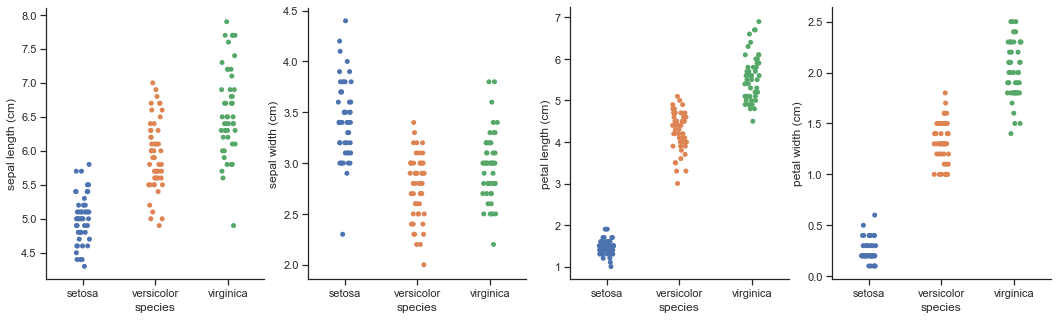

In [59]:
fig,axes = plt.subplots(1,4,figsize=(18,5))
sns.stripplot(x='species',y='sepal length (cm)',data=df,ax=axes[0])
sns.stripplot(x='species',y='sepal width (cm)',data=df,ax=axes[1])
sns.stripplot(x='species',y='petal length (cm)',data=df,ax=axes[2])
sns.stripplot(x='species',y='petal width (cm)',data=df,ax=axes[3])

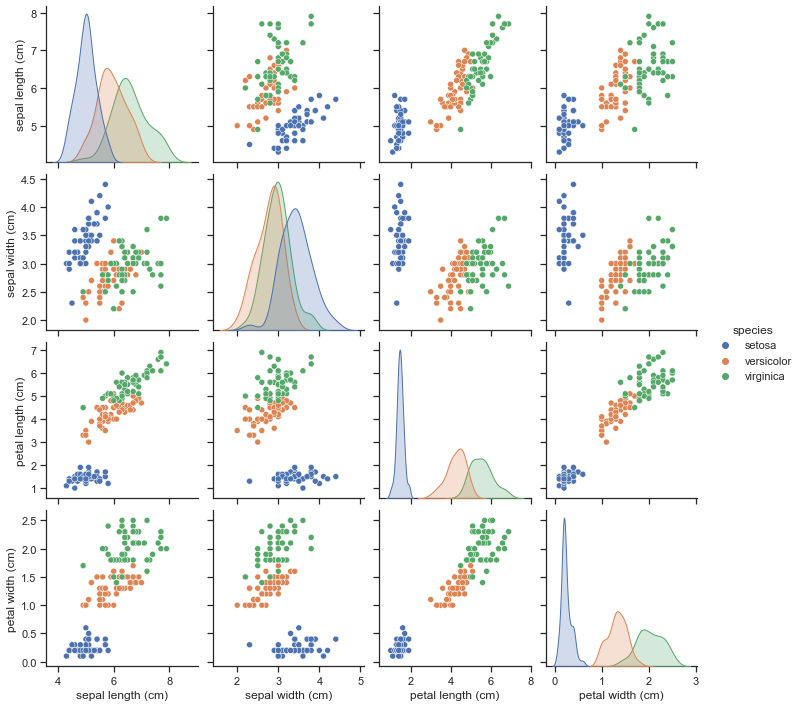

In [60]:
sns.pairplot(df, hue='species')